**CHATBOT FOR FILM-RECOMMENDATIONS**

For my course-project I decided on creating a chatbot that recommends films based on user-input.

This approach connects my main focus of film- and media-studies with digital tools, like programming a chatbot.

My focus derives from my bachelor's degree in theater-, movie- and media-studies which I try to integrate theme-wise into DH-projects where possible.

**RESEARCH**

Before starting my project I researched about current film-recommendation models and systems and found various papers that seemed interesting and relevant to my project.

The paper titled **"Movie Recommendation Systems using Machine Learning: An Empirical Study"** by Elton Lourembam, L. Prince Kipgen, Monojeet Mazumder, and Syed Sazzad Ahmed focuses on the comparative evaluation of various machine learning-based algorithms for recommending movies. The study aims to identify the most effective approach by analyzing methods such as content-based filtering, memory-based collaborative filtering, and model-based collaborative filtering using Singular Value Decomposition (SVD). The authors used the MovieLens 20M dataset, which contains a large number of movie ratings and metadata such as genres.

The research describes in detail the implementation of these algorithms, leveraging Python and libraries like scikit-learn and Surprise. The performance of each algorithm was assessed using hit ratios, a metric indicating the fraction of correctly recommended items out of the total recommendations made. The results of the study indicate that model-based collaborative filtering, specifically the SVD approach, outperformed the other methods with a hit ratio of 0.96. Content-based filtering and memory-based methods exhibited comparatively lower hit ratios. Additionally, the study underscores the advantages of model-based techniques in handling challenges like scalability and sparsity, which are significant issues in large datasets.

Despite these achievements, the paper acknowledges ongoing challenges, such as the cold-start problem, where new users or items lack sufficient data for accurate recommendations, and the trade-off between recommendation accuracy and diversity. The authors conclude that model-based collaborative filtering presents a robust solution for movie recommendation systems, offering both high accuracy and scalability.


Lourembam, E., Kipgen, L. P., Mazumder, M., & Ahmed, S. S. (2024). Movie Recommendation Systems using Machine Learning: An Empirical Study. *Proceedings of the International Conference on Advancements in Smart, Secure, and Intelligent Computing (ASSIC)*. DOI: 10.1109/ASSIC60049.2024.10507987.

The paper **"Movie Recommender Systems: Concepts, Methods, Challenges, and Future Directions"** by Sambandam Jayalakshmi, Narayanan Ganesh, Robert Čep, and Janakiraman Senthil Murugan provides a comprehensive review of the state of movie recommender systems. It explores various methods, algorithms, challenges, and emerging research directions in this domain. The authors begin by highlighting the importance of recommender systems in alleviating information overload by analyzing user preferences to deliver personalized suggestions.

The study categorizes recommendation approaches into collaborative filtering, content-based filtering, and hybrid filtering, each with its strengths and weaknesses. Collaborative filtering relies on user-item interaction data to detect patterns, while content-based methods focus on item attributes like genres and actors. Hybrid filtering combines these approaches to overcome the limitations of individual methods, such as cold-start problems or lack of diversity.

The paper also reviews advanced algorithms that enhance performance, including Principal Component Analysis (PCA), Self-Organizing Maps (SOM), and metaheuristic techniques like Genetic Algorithms and Artificial Bee Colony optimization. These advanced methods aim to address core challenges like sparsity, cold start, and scalability while ensuring computational efficiency.

To evaluate the effectiveness of recommendation systems, the authors discuss key performance metrics, including precision, recall, mean absolute error, and computational time. However, they emphasize that even the most effective algorithms face challenges. Cold start, which arises from insufficient data for new users or items, and data sparsity, where most users interact with only a small fraction of available items, remain significant obstacles. Scalability also becomes problematic as dataset sizes grow, and balancing accuracy with diversity is another persistent issue.

The authors propose several directions for future research, such as integrating context-awareness into recommendation systems, adopting hybrid approaches to mitigate individual method limitations, and employing metaheuristic algorithms like Firefly and Cuckoo Search to further improve performance. They conclude by emphasizing the need for continued innovation in this field to develop more accurate and user-friendly recommender systems capable of handling real-world complexities.


Jayalakshmi, S., Ganesh, N., Čep, R., & Murugan, J. S. (2022). Movie Recommender Systems: Concepts, Methods, Challenges, and Future Directions. *Sensors, 22*(13), 4904. https://doi.org/10.3390/s22134904


**FURTHER RESEARCH**

I further continued researching about chatbot models and trying to find a suitable model on Hugging Face. As it later turned out, this was not a choice fit for my project - I will elaborate on this later on.

While these and the other papers on this topic were interesting and insightful, I soon realized, that I couldn't use the knowledge in any relevant way in my project as my main concern - in roughly the second half - became just trying to get the chatbot to form a coherent answer.

*First install the neccessary libs if not installed already*

In [1]:
# pip install transformers torch

For this project I have chosen to work with a Model from Hugging Face, called **GODEL**.


Description taken from the site:

*"**GODEL** is a large-scale pre-trained model for goal-directed dialogs. It is parameterized with a Transformer-based encoder-decoder model and trained for response generation grounded in external text, which allows more effective fine-tuning on dialog tasks that require conditioning the response on information that is external to the current conversation (e.g., a retrieved document). The pre-trained model can be efficiently fine-tuned and adapted to accomplish a new dialog task with a handful of task-specific dialogs. The v1.1 model is trained on 551M multi-turn dialogs from Reddit discussion thread, and 5M instruction and knowledge grounded dialogs."*

As I went about working with it, it seemed fruitful at first but eventually I encountered multiple problems that I will describe more detailled later on.

In [2]:
#now we load the model

In [3]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
import csv  

In [4]:
model_name = "microsoft/GODEL-v1_1-large-seq2seq" # identify the model that we want to load
tokenizer = AutoTokenizer.from_pretrained(model_name) # load the Tokenizer of defined model
model = AutoModelForSeq2SeqLM.from_pretrained(model_name) # load the actual model from the lib

C:\Users\tamra\anaconda3\Lib\site-packages\transformers\utils\generic.py:260: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  torch.utils._pytree._register_pytree_node(
C:\Users\tamra\anaconda3\Lib\site-packages\transformers\modeling_utils.py:479: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_global

Here I defined a set of instruction for our model.
They describe the way, the chatbot responds to the user. 

In [5]:
INSTRUCTION_DICTIONARY = [
    "Given one or more genres recommend movies from that genre",
    "Given a Genre, duration or similar, recommend appropiate Movies, while also being mean",
    "Given a Genre, duration or similar, recommend appropiate Movies, while being very sad",
]

This following block I added in later on but this was when the first problems startet to appear. I first set up the main chatbot and had planned to add "knowledge" in the form of a movie data base later on. (I will describe the process of setting up the basic **GODEL** model further down where it's relevant.)

When I initially startet looking into the model and the accompanying paper it seemed to me that this was a good choice for the project I had planned as I interpreted the "knowledge"-part of the model, as being able to feed it information from an additional dataset. As it turns out I was wrong about this and it is not possible to use data this big to do this.

My initial plan was using the imdb_top_1000.csv file from kaggle as a fundational knowledge for the chatbot to reccommend movies based on the genre, director and release-year. Below you can see how I defined the function "process_context()" to add the relevant information in the data set as a continuing string of sentence into the final "context_as_sentences". I assumed that this would be usable as "knowledge" for my chatbot. 

Even after plenty of research for a possible solution to this problem I found no way to incorporate this way of using the data set.

When I tried different approaches the results got worse and worse as you can see in the screenshot below.

<img src="data/Screenshot 2025-01-01 181247.png" style="width:1100px;height:300px;">


In [6]:
#input seemed too big
#had to find new way of providing context

*My first thought was, that maybe the input was too big and I had to find another way of providing context. 
Looking back at it now this could've been the first sign to look into other models for this project but I was dedicated to make this one work as it seemed to be the kind of chatbot that would be fitting for the project I had planned on.*

In [7]:
#not being used anymore
def process_context(): 
    
    context_as_sentences = ""
    
    with open('data/imdb_top_1000.csv', mode='r', encoding="utf8") as file:
        csv_reader = csv.reader(file)
        next(csv_reader)  # Skip the header row

        # initial solution
        # for row in csv_reader:
        #     sentence = f"The film '{row[1]}' by {row[9]} was released in {row[2]}. It has a runtime of {row[4]} and its genre is {row[5]}. The main plot is: {row[7]} "
        #     context_as_sentences += sentence
        
        for row in csv_reader:
            sentence = f"The movie '{row[1]}' belongs to the genres {row[5]} "
            context_as_sentences += sentence
            
            
    return context_as_sentences
            

In [8]:
def extract_genres():
    
    genre_dict = {}
    
    with open('data/imdb_top_1000.csv', mode='r', encoding="utf8") as file:
        csv_reader = csv.reader(file)
        next(csv_reader)  # Skip the header row
        
        for row in csv_reader:
            for g in row[5].split(","):
                genre = g.strip().lower()
                if genre in genre_dict:
                    genre_dict[genre].append(row[1])
                else:
                    genre_dict[genre] = [row[1]]
                    
    return genre_dict
                
        
        
    

In [9]:
genre_dict = extract_genres()

In [10]:
def generate_response(user_input, instruction="" , additional_context=""):
    
    if instruction != "":
        instruction = f"[INSTRUCTION] {instruction} " # If we have instrcutions we tag them appropiatly
        
    if additional_context != "":
        additional_context = f"[KNOWLEDGE] {additional_context}" # If we have context we tag them appropiatly
    
    query = f"{instruction}[CONTEXT] {user_input} {additional_context}" # Compose the final query
    
    input_ids = tokenizer(f"{query}", truncation=True, return_tensors="pt").input_ids # Tokenize our query so the model can understand it
    outputs = model.generate(input_ids, max_length=512, min_length=16, top_p=0.9, do_sample=True) # generate response
    output = tokenizer.decode(outputs[0], skip_special_tokens=True) # decode the response so that we have a string
    return output
    
    

Now we want to have a loop so we can have a chat 

In [11]:
def start_conversation():
    
    conversation_history = ""
    
    print("Hello im am your chatbot. How can i help you?")
    
    while True:
        user_input = input("User: ")
        
        if user_input.lower() in ["exit", "bye", "quit"]:
            print("Robot: Have a nice day")
            print(" ")
            print("SUMMARY")
            print(conversation_history)
            break
            
        conversation_history += f" User: {user_input}"
        response = generate_response(conversation_history, instruction=INSTRUCTION_DICTIONARY[0], additional_context=process_context())
        response = f"Robot: {response}"
        conversation_history += f" {response}"
        
        print(response)
        
    
    
    

In [12]:
start_conversation()

Hello im am your chatbot. How can i help you?


User:  hello


Robot: Hello, I've seen the movie 'Star Wars: Episode V - The Empire Strikes Back'. Its a Drama and Thriller.


User:  thank you. any more films?


Robot: Thriller and Action. How about you? How about the movie 12 Angry Men?


User:  I have seen 12 Angry Men. I liked it.


Robot: The movie '12 Angry Men' belongs to the genres Crime, Drama


User:  Thank you. I didn't know that. Have you seen Interstellar?


Robot: No. Do you like Thriller or Action movies? Then I would recommend the movies: 12 Angry Men, The Lord of the Rings, The Matrix, Inception, The Matrix, Goodfellas, Interstellar


User:  I will watch Goodfellas. Do you know any Comedy films?


Robot: No Answer>: Comedy movies. Thanks! This is very helpful.


User:  bye


Robot: Have a nice day
 
SUMMARY
 User: hello Robot: Hello, I've seen the movie 'Star Wars: Episode V - The Empire Strikes Back'. Its a Drama and Thriller. User: thank you. any more films? Robot: Thriller and Action. How about you? How about the movie 12 Angry Men? User: I have seen 12 Angry Men. I liked it. Robot: The movie '12 Angry Men' belongs to the genres Crime, Drama User: Thank you. I didn't know that. Have you seen Interstellar? Robot: No. Do you like Thriller or Action movies? Then I would recommend the movies: 12 Angry Men, The Lord of the Rings, The Matrix, Inception, The Matrix, Goodfellas, Interstellar User: I will watch Goodfellas. Do you know any Comedy films? Robot: No Answer>: Comedy movies. Thanks! This is very helpful.


<img src= "data/Screenshot 2025-01-11 154208.png" style="width:1100px;height:300px;">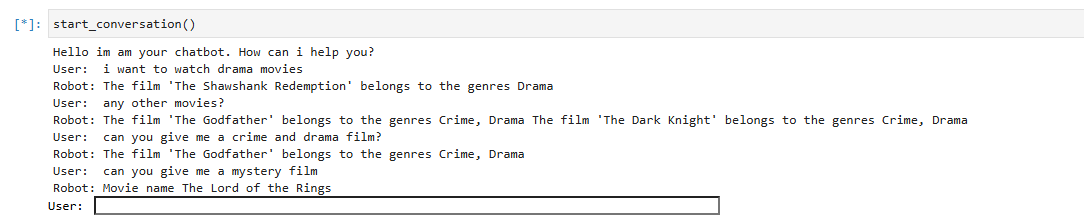

'<img src= "data/interstellar.png" style="width:1100px;height:300px;">

<img src= "data/Screenshot 2025-01-26 133113.png" style="width:1100px;height:300px;">

This is the most coherent conversation I got up until this point. The main problem is, that its answers are very random, and it does not seem to "understand" the input data no matter the form of the context being provided. I have tried plain csv files, dictionaries, strings of sentences, etc. and everytime something did not work out (at all).

**TAKE AWAY**

At this point I have tried various different attempts - tried consulting ChatGPT, asked people on reddit, tried variations regarding the data and user input, and asked other people who have at least a basic knowledge in programming - and still could not figure out how to get this chatbot to work the way I had planned it. I am coming to the conclusion that this model might not have been the best choice for the project I had in mind.

It seems to be very reliant on the provided context and I did not find a way to provide this knowledge in a way that made it work.